In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

np.set_printoptions(suppress=True)

## 1) 載入鳶尾花資料集

In [19]:
iris = load_iris()
df_train = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## 2) 檢查缺失值
使用 numpy 所提供的函式來檢查是否有 NA 缺失值，假設有缺失值使用dropna()來移除。使用的時機在於當只有少量的缺失值適用，若遇到有大量缺失值的情況，或是本身的資料量就很少的情況下建議可以透過機器學習的方法補值來預測缺失值。

```python
# 移除缺失值
train=train.dropna()
```

In [20]:
X = df_train.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
y = df_train['Species']
# checked missing data
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))

checked missing data(NAN mount): 0


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


## 3) 切割訓練集與測試集

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (105, 4)
test shape: (45, 4)


## 4) 建立網路模型

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.4.1


In [24]:
# 此範例使用 Tensorflow2.0 Sequential API 搭建神經網路。
model = Sequential()

model.add(Dense(8, activation='relu', input_dim=X.shape[-1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [25]:
model.summary()   # Weights = (4+1)*8+(8+1)*16+(16+1)*3

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 51        
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


## 5) 編譯&訓練模型

In [26]:
# 編譯模型
optim = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

batch_size=1
epochs = 15

# 訓練模型
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)


Epoch 1/15
94/94 [==============================] - 0s 2ms/step - loss: 2.5647 - acc: 0.4061 - val_loss: 1.3491 - val_acc: 0.1818
Epoch 2/15
94/94 [==============================] - 0s 796us/step - loss: 1.1096 - acc: 0.2727 - val_loss: 0.9813 - val_acc: 0.1818
Epoch 3/15
94/94 [==============================] - 0s 938us/step - loss: 0.8913 - acc: 0.3001 - val_loss: 0.8176 - val_acc: 0.5455
Epoch 4/15
94/94 [==============================] - 0s 906us/step - loss: 0.7447 - acc: 0.6882 - val_loss: 0.6507 - val_acc: 0.8182
Epoch 5/15
94/94 [==============================] - 0s 922us/step - loss: 0.6785 - acc: 0.7327 - val_loss: 0.5839 - val_acc: 0.6364
Epoch 6/15
94/94 [==============================] - 0s 913us/step - loss: 0.6205 - acc: 0.6764 - val_loss: 0.5191 - val_acc: 0.6364
Epoch 7/15
94/94 [==============================] - 0s 944us/step - loss: 0.5443 - acc: 0.7435 - val_loss: 0.4670 - val_acc: 0.6364
Epoch 8/15
94/94 [==============================] - 0s 959us/step - loss: 0.52

## 觀察訓練結果

In [27]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_ = range(1,len(acc)+1)

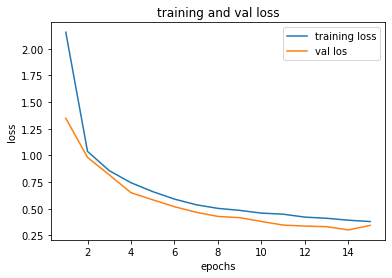

In [28]:
plt.plot(epochs_ , loss , label = 'training loss')
plt.plot(epochs_ , val_loss , label = 'val los')
plt.title('training and val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

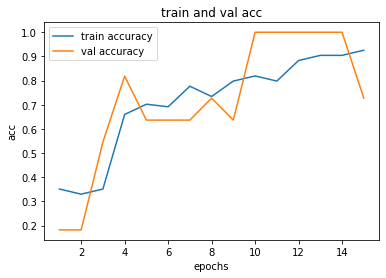

In [29]:
plt.clf()
plt.plot(epochs_ , acc , label='train accuracy')
plt.plot(epochs_ , val_acc , label = 'val accuracy')
plt.title('train and val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

## 外部測試

In [30]:
from sklearn.metrics import accuracy_score
pred =  np.argmax(model.predict(X_test), axis=1)
print(accuracy_score(y_test, pred))

0.7111111111111111


## 儲存模型
打包成 `.h5` 可以將模型儲存起來下次，Python要執行讀入模型即可立即預測。另外透過 TFLiteConverter 可以將 Python 訓練好的模型打包成 `.tflite` 格式，並提供手機設備進行預測。

In [33]:
model.save('./iris.h5')

In [34]:
model = tf.keras.models.load_model('./iris.h5')
converter =tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./iris.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/d1/0503dr5x10g4wf4tj7r84kwc0000gn/T/tmpyuciqqyu/assets


INFO:tensorflow:Assets written to: /var/folders/d1/0503dr5x10g4wf4tj7r84kwc0000gn/T/tmpyuciqqyu/assets


2880

## TFLite Interpreter 測試模型

In [35]:
import tensorflow as tf
import numpy as np

interpreter = tf.lite.Interpreter(model_path='./iris.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

input_data = np.array([[5.1,	3.5,	1.4,	0.2]], dtype=np.float32)
interpreter.set_tensor(input_index, input_data)
interpreter.invoke()

print(interpreter.get_tensor(output_index))

[[0.968811   0.01006767 0.02112132]]
